# The soil production function

This notebook shows a few plots about the soil production function.
We look at both the exponential soil production function and a soil production function that peaks at intermediate soil thickness.

The exponential soil production function looks like this:
    
$p = W_0 e^{-\frac{h}{\gamma}}$

where $W_0$ is the soil production rate with no soil, and $\gamma$ is a length scale that determines how quickly soil production falls off with depth.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
h_locs = np.arange(0,2,0.1)

In [12]:
def soil_prod_function(h_locs, W_0 = 0.0001, gamma = 0.4):
    P = np.multiply(W_0,  np.exp( - np.divide(h_locs,gamma)  )  )
    return P

In [27]:
plt.rcParams['figure.figsize'] = [10, 3]

<Figure size 720x216 with 0 Axes>

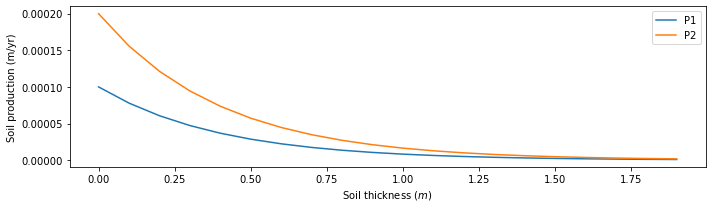

In [29]:
plt.clf()

W_0 = 0.0001
gamma = 0.4

W_02 = 0.0002
gamma2 = 0.4


P = soil_prod_function(h_locs, W_0 = W_0, gamma = gamma)
P2 = soil_prod_function(h_locs, W_0 = W_02, gamma = gamma2)

# print(P)

f, ax = plt.subplots(1, 1)
ax.plot(h_locs, P,label="P1")
ax.plot(h_locs, P2,label="P2")


ax.set_xlabel("Soil thickness ($m$)")
ax.set_ylabel("Soil production (m/yr)")

ax.legend()
plt.tight_layout()